In [258]:
description = "The Average Life Expectancy at Birth is from the World Health Statistics 2016 by Global health Observatory. The population growth rate is from the CIA. Below are the links for the data"
populationGrowthLink = "https://www.cia.gov/library/publications/the-world-factbook/fields/2002.html"
globalHealthStatistics2016File = "http://www.who.int/gho/publications/world_health_statistics/2016/Annex_B/en/"

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [231]:
# Import Excel Files
lifeExpecFile = pd.read_excel("/Users/Zach/Desktop/Data Science/Health on Population Growth/LifeExpectancyPopulationGrowth.xlsx")
populationGrowthFile = pd.read_excel("/Users/Zach/Desktop/Data Science/Health on Population Growth/PopulationGrowth.xlsx")   

In [232]:
# Checkout the files
print(lifeExpecFile.head())
print(populationGrowthFile.head())

       Country  Life_Expectancy_at_Birth_Both_Sexes
0  Afghanistan                                 60.5
1      Albania                                 77.8
2      Algeria                                 75.6
3      Andorra                                  NaN
4       Angola                                 52.4
          Country  Population_Growth_Rate
0     Afghanistan                    2.36
1         Albania                    0.31
2         Algeria                    1.70
3  American Samoa                   -1.30
4         Andorra                    0.03


In [233]:
# Now that both files are imported, we need to merge the two files together
data = pd.merge(lifeExpecFile, populationGrowthFile, left_on='Country', right_on='Country')

In [234]:
# Convert data from strings to floats
data['Life_Expectancy_at_Birth_Both_Sexes'] = pd.to_numeric(data.Life_Expectancy_at_Birth_Both_Sexes, errors='coerce')

In [284]:
# Define X and y
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values
X

array([[60.5],
       [77.8],
       [75.6],
       [ nan],
       [52.4],
       [76.4],
       [76.3],
       [74.8],
       [82.8],
       [81.5],
       [72.7],
       [76.9],
       [71.8],
       [75.5],
       [72.3],
       [81.1],
       [70.1],
       [60. ],
       [69.8],
       [77.4],
       [65.7],
       [75. ],
       [74.5],
       [59.9],
       [59.6],
       [73.3],
       [68.7],
       [57.3],
       [82.2],
       [52.5],
       [53.1],
       [80.5],
       [76.1],
       [74.8],
       [63.5],
       [ nan],
       [79.6],
       [78. ],
       [79.1],
       [80.5],
       [80.6],
       [63.5],
       [ nan],
       [73.9],
       [76.2],
       [70.9],
       [73.5],
       [58.2],
       [64.7],
       [77.6],
       [64.8],
       [69.9],
       [81.1],
       [82.4],
       [66. ],
       [74.4],
       [81. ],
       [62.4],
       [81. ],
       [73.6],
       [71.9],
       [59. ],
       [58.9],
       [66.2],
       [63.5],
       [74.6],
       [75

In [285]:
# Take care of missing data which in this case is in the form of 'NaN'
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy='most_frequent')
imputer.fit(X[:,0:1])
X[:, 0:1] = imputer.transform(X[:,0:1])

In [286]:
# Average lifespan on population growth
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [287]:
# The coefficients
print('Coefficients for populationGrowthRate = B0 + (B1)lifeExpectancy where B1 = ' + str(reg.coef_[0]) + ' and B0 = ' + str(reg.intercept_))
print("Thus, on average, if countries were to increase the average life expectancy by one year, then there would be a " + str(reg.coef_[0]) + " drop in the growth rate")


Coefficients for populationGrowthRate = B0 + (B1)lifeExpectancy where B1 = -0.0685878149881437 and B0 = 5.979519235138825
Thus, on average, if countries were to increase the average life expectancy by one year, then there would be a -0.0685878149881437 drop in the growth rate


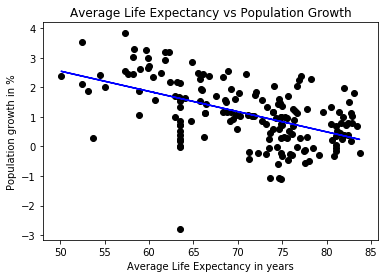

In [297]:
# Graph Regression

# Generate predicted values to draw line
y_pred = reg.predict(X)

plt.plot(X,y_pred, color ='blue')

# Plot data points
plt.scatter(X,y,color='black')
plt.title("Average Life Expectancy vs Population Growth")
plt.ylabel("Population growth in %")
plt.xlabel("Average Life Expectancy in years")

plt.show()